In [1]:
#pip install -r requirements.txt

In [2]:
from mkspecbias import mkspecbias
from mkspecflat import mkspecflat

from crremoval import crremoval
from reduceobs import reduce_obs

from extract_1d import extract_1d_spec

from standard import standard

from sensfunction import sensfunc

from calibrate import calibrate


In [3]:
import os
import os

### Directory with all raw data: 

INPUT_DIR = "/home/kostasvaleckas/Documents/DAWN/PyLongslit_notebook/raw/"

### Directory where all output will be stored

OUTPUT_DIR = '/home/kostasvaleckas/Documents/DAWN/PyLongslit_notebook/output_pylongslit_test'

# If output directory does not exist, create it

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)




BIAS:

In [4]:
xsize = 500
ysize = 2102

bias_list = [
    "ALDh140351.fits",
    "ALDh140352.fits",
    "ALDh140353.fits",
    "ALDh140354.fits",
    "ALDh140355.fits",
    "ALDh140356.fits",
    "ALDh140357.fits",
    "ALDh140358.fits",
    "ALDh140359.fits",
    "ALDh140360.fits",
    "ALDh140361.fits"
    ]


mkspecbias(xsize, ysize, bias_list, inp_dir=INPUT_DIR, out_dir=OUTPUT_DIR)


 ---Using the following parameters for bias:---

ysize = 2102
xsize = 500
----------------------------------------

Image number: 0
Subtracted the median value of the overscan : 11312.587432930377
Image number: 1
Subtracted the median value of the overscan : 11310.44430797078
Image number: 2
Subtracted the median value of the overscan : 11305.55084362273
Image number: 3
Subtracted the median value of the overscan : 11305.644450190704
Image number: 4
Subtracted the median value of the overscan : 11301.88415540759
Image number: 5
Subtracted the median value of the overscan : 11300.727131682721
Image number: 6
Subtracted the median value of the overscan : 11304.139634106923
Image number: 7
Subtracted the median value of the overscan : 11305.28288835736
Image number: 8
Subtracted the median value of the overscan : 11298.940461568298
Image number: 9
Subtracted the median value of the overscan : 11299.529639925011
Image number: 10
Subtracted the median value of the overscan : 11300.45148361

FLATS:

In [5]:
flat_list = [
    "ALDh130384.fits",
    "ALDh130385.fits",
    "ALDh130386.fits",
    "ALDh130387.fits",
    "ALDh130388.fits",
    "ALDh140211.fits",
    "ALDh140219.fits",
    "ALDh140230.fits",
    "ALDh140238.fits"
    ]

mkspecflat(xsize, ysize, flat_list, inp_dir=INPUT_DIR, out_dir=OUTPUT_DIR)


 ---Using the following parameters for flats:---

ysize = 2102
xsize = 500
----------------------------------------

Image number: 0
Subtracted the median value of the overscan : 11366.882991790031
Subtracted the BIAS
Normalised with the median of the frame : 126860.20053009245
Image number: 1
Subtracted the median value of the overscan : 11359.516322968519
Subtracted the BIAS
Normalised with the median of the frame : 127778.15149654148
Image number: 2
Subtracted the median value of the overscan : 11357.927209257225
Subtracted the BIAS
Normalised with the median of the frame : 127903.43997672765
Image number: 3
Subtracted the median value of the overscan : 11355.195229168014
Subtracted the BIAS
Normalised with the median of the frame : 128495.4437584847
Image number: 4
Subtracted the median value of the overscan : 11353.14674510311
Subtracted the BIAS
Normalised with the median of the frame : 129147.98164070076
Image number: 5
Subtracted the median value of the overscan : 11296.992695

/home/kostasvaleckas/Documents/DAWN/PyLongslit_notebook/mkspecflat.py:46: RuntimeWarning: invalid value encountered in divide
  medianflat[:,i] = medianflat[:,i] / lampspec[:]


Cosmic-Ray removal:

In [6]:
#Science

# THESE HAVE TO BE FOR YOUR OBSERVATION
gain = 0.16 # LOOK UP fitsfile[1].header['GAIN']
ron = 4.3 # LOOK UP fitsfile[1].header['RDNOISE']

# THSE CAN BE SET DIFFERENTLY AS NEEDED
frac = 0.01
objlim = 15
sigclip = 5
niter = 5

list_science = [
    "ALDh120177.fits",
    "ALDh120178.fits"
]

list_standard = [
    "ALDh120217.fits"
]

crremoval(gain, 
          ron, 
          list_science,
          inp_dir=INPUT_DIR,
          out_dir=OUTPUT_DIR,
          frac=frac,
          objlim=objlim,
          sigclip=sigclip,
          niter=niter
          )

crremoval(gain, 
          ron, 
          list_standard,
          inp_dir=INPUT_DIR,
          out_dir=OUTPUT_DIR,
          frac=frac,
          objlim=objlim,
          sigclip=sigclip,
          niter=niter
          )

Script running

 ---Using the following parameters:---

gain = 0.16
ron = 4.3
frac = 0.01
objlim = 15
sigclip = 5
niter = 5
----------------------------------------

Removing cosmics from file: ALDh120177.fits...
Starting 5 L.A.Cosmic iterations
Iteration 1:
252 cosmic pixels this iteration
Iteration 2:
0 cosmic pixels this iteration
No bad-pixel extension present. No flag set for corrected pixels
Removing cosmics from file: ALDh120178.fits...
Starting 5 L.A.Cosmic iterations
Iteration 1:
226 cosmic pixels this iteration
Iteration 2:
3 cosmic pixels this iteration
Iteration 3:
0 cosmic pixels this iteration
No bad-pixel extension present. No flag set for corrected pixels
Script running

 ---Using the following parameters:---

gain = 0.16
ron = 4.3
frac = 0.01
objlim = 15
sigclip = 5
niter = 5
----------------------------------------

Removing cosmics from file: ALDh120217.fits...
Starting 5 L.A.Cosmic iterations
Iteration 1:
354 cosmic pixels this iteration
Iteration 2:
355 cosmic pixe

In [7]:
# This helps to make lists with correct naming after 
# the cosmic rays have been removed: 

list_science_crr_removed = ["crr" + filename.split("/")[-1] for filename in list_science]
list_standard_crr_removed = ["crr" + filename.split("/")[-1] for filename in list_standard]

In [8]:
# Arc frames:

list_arc = [
    "ALDh120176.fits",
    "ALDh120179.fits"
]

Reduce science object and arcs:

In [9]:
xsize = 500
ysize = 2102

# The x-coordinates of the object centers. 
# Must be same length number of exposures, and sorted to match
# the exposure frames in alphabetical order.
centers = [250, 273] 

reduce_obs(xsize, 
           ysize, 
           centers, 
           list_science_crr_removed, 
           list_arc, 
           inp_dir=INPUT_DIR,
           out_dir=OUTPUT_DIR,   
           standard_star_reduction = False)

Script running

 ---Using the following parameters:---

ysize = 2102
xsize = 500
Is this a standard star reduction? = False

Object centers: [250, 273]


 -------------------------------------

Number of raw images: 2
Info on file:
Filename: /home/kostasvaleckas/Documents/DAWN/PyLongslit_notebook/output_pylongslit_test/crrALDh120177.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     152   ()      
  1  im1           1 ImageHDU        37   (500, 2102)   float32   


None
Subtracted the median value of the overscan : 11368.939
sub1.fits
Info on file:
Filename: /home/kostasvaleckas/Documents/DAWN/PyLongslit_notebook/output_pylongslit_test/crrALDh120178.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     152   ()      
  1  im1           1 ImageHDU        37   (500, 2102)   float32   
None
Subtracted the median value of the overscan : 11368.878
sub2.fits


/home/kostasvaleckas/Documents/DAWN/PyLongslit_notebook/reduceobs.py:61: RuntimeWarning: divide by zero encountered in divide
  specdata = (specdata-BIAS)/FLAT


Subtracted the median value of the overscan : 22734.91683708248




ATTENTION: THIS REDUCTION HAS BEEN RUN AS A SCIENCE OBJECT REDUCTION
If this is a standard star reduction, please use "reducestd.py" script,and re-run both the standard star and science object reductions. 




/home/kostasvaleckas/Documents/DAWN/PyLongslit_notebook/reduceobs.py:105: RuntimeWarning: divide by zero encountered in divide
  specdata = (specdata-BIAS)/FLAT


In [10]:
xsize = 500
ysize = 2102


# The x-coordinates of the object centers. 
# Must be same length number of exposures, and sorted to match
# the exposure frames in alphabetical order.
centers = [251] 


reduce_obs(xsize, 
           ysize, 
           centers, 
           list_standard_crr_removed, 
           list_arc, 
           inp_dir=INPUT_DIR,
           out_dir=OUTPUT_DIR,   
           standard_star_reduction = True)

Script running

 ---Using the following parameters:---

ysize = 2102
xsize = 500
Is this a standard star reduction? = True

Object centers: [251]


 -------------------------------------

Number of raw images: 1
Info on file:
Filename: /home/kostasvaleckas/Documents/DAWN/PyLongslit_notebook/output_pylongslit_test/crrALDh120217.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     152   ()      
  1  im1           1 ImageHDU        37   (500, 2102)   float32   


None
Subtracted the median value of the overscan : 11363.087
sub1.fits
Subtracted the median value of the overscan : 22734.91683708248




ATTENTION: THIS REDUCTION HAS BEEN RUN AS A STANDARD STAR REDUCTION
If this is an object reduction, please use "reducescience.py" script, and re-run both the standard star and science object reductions. 




In [11]:
# leave this for now, might have to go this way: 
# TODO: Windows tests!

# Path to linelist

linelist = "/home/kostasvaleckas/Documents/DAWN/PyLongslit_notebook/database/mylines_vac.dat"


os.system("python3 identify.py --lines " + linelist + " " + OUTPUT_DIR + "/arcsub.fits")

#os.system("python3 identify.py")


Found a preexisting pixel table.


libGL error: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: iris
libGL error: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: iris
libGL error: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: swrast


0

A lot of parameters for extract 1 d




In [12]:
# Parameters for IDENTIFY
FITTING_MODEL_ID = 'Chebyshev'
ORDER_ID = 6 
FWHM_ID = 2.5 # rough guess of FWHM of lines in IDENTIFY (pixels)

# Parameters for REIDENTIFY
FITTING_MODEL_REID = 'Chebyshev',
STEP_REID = 5  # Reidentification step size in pixels (spatial direction)
TOL_REID = 25 # tolerence to lose a line in pixels
ORDER_WAVELEN_REID = 6

# Parameters for APALL (sky fitting and aperture extract after sky subtraction)

## parameters for finding aperture
NSUM_AP = 10
FWHM_AP = 10
STEP_AP = 10  # Recentering step size in pixels (dispersion direction)

## parameters for aperture tracing
FITTING_MODEL_APTRACE = 'Chebyshev'
ORDER_APTRACE = 3
SIGMA_APTRACE = 3
ITERS_APTRACE = 5 

## parameters for sky fitting
FITTING_MODEL_APSKY = 'Chebyshev'
ORDER_APSKY = 2
SIGMA_APSKY = 3
ITERS_APSKY = 5

DISPAXIS = 1  # 1 = line = python_axis_1 // 2 = column = python_axis_0

In [13]:
%matplotlib qt

In [14]:
extract_1d_spec(
        out_dir = OUTPUT_DIR,
        # Parameters for identify
        FITTING_MODEL_ID = 'Chebyshev',
        FWHM_ID = 2.5,
        ORDER_ID = 6,
        # Parameters for reidentify
        FITTING_MODEL_REID = 'Chebyshev',
        TOL_REID = 25,
        STEP_REID = 5,
        ORDER_WAVELEN_REID = 6,
        ORDER_SPATIAL_REID = 5,
        # Parameters for finding aperture
        NSUM_AP = 10,
        STEP_AP = 10,
        FWHM_AP = 10,
        # parameters for aperture tracing
        FITTING_MODEL_APTRACE = 'Chebyshev',
        ORDER_APTRACE = 3,
        SIGMA_APTRACE = 3,
        ITERS_APTRACE = 5, 
        # parameters for sky fitting
        FITTING_MODEL_APSKY = 'Chebyshev',
        SIGMA_APSKY = 3,
        ITERS_APSKY = 5,
        ORDER_APSKY = 2,
        # Dispersion axis
        DISPAXIS = 1,
        standard_star = False)

Got Gain:  0.16  and Read-out noise:  4.3
Reidentify each section by Chebyshev (order 6)
section      |  found  |  RMS


/home/kostasvaleckas/anaconda3/envs/PyLongslit_jupyter/lib/python3.10/site-packages/astropy/modeling/functional_models.py:218: RuntimeWarning: divide by zero encountered in divide
  return amplitude * np.exp(-0.5 * (x - mean) ** 2 / stddev**2)


[0000:0005]	33/35	19.951
[0005:0010]	33/35	21.367
[0010:0015]	33/35	21.394
[0015:0020]	33/35	21.297
[0020:0025]	33/35	21.405
[0025:0030]	33/35	20.839
[0030:0035]	33/35	21.544
[0035:0040]	33/35	21.271
[0040:0045]	33/35	21.383
[0045:0050]	33/35	21.204
[0050:0055]	33/35	21.607
[0055:0060]	32/35	18.177
[0060:0065]	31/35	9.998
[0065:0070]	31/35	9.937
[0070:0075]	30/35	1.165
[0075:0080]	33/35	21.496
[0080:0085]	31/35	9.971
[0085:0090]	31/35	10.019
[0090:0095]	32/35	18.783
[0095:0100]	31/35	10.093
[0100:0105]	32/35	19.750
[0105:0110]	32/35	18.568
[0110:0115]	33/35	21.673
[0115:0120]	33/35	21.515
[0120:0125]	31/35	10.092
[0125:0130]	31/35	10.058
[0130:0135]	30/35	1.494
[0135:0140]	31/35	10.109
[0140:0145]	33/35	20.533
[0145:0150]	31/35	10.241
[0150:0155]	30/35	1.412
[0155:0160]	32/35	19.697
[0160:0165]	30/35	1.385
[0165:0170]	31/35	10.143
[0170:0175]	30/35	1.459
[0175:0180]	30/35	1.605
[0180:0185]	31/35	10.211
[0185:0190]	30/35	1.592
[0190:0195]	30/35	1.570


libGL error: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: iris
libGL error: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: iris
libGL error: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: swrast


First click on sky-region left of the trace (start, end), then the trace and finally sky region right of the trace (star, end). End with q


/home/kostasvaleckas/anaconda3/envs/PyLongslit_jupyter/lib/python3.10/site-packages/astropy/modeling/functional_models.py:218: RuntimeWarning: divide by zero encountered in divide
  return amplitude * np.exp(-0.5 * (x - mean) ** 2 / stddev**2)


1700 1700
 
** Wrote output file '/home/kostasvaleckas/Documents/DAWN/PyLongslit_notebook/output_pylongslit_test/obj.ms_1d.fits' .
 
 
** Wrote output file '/home/kostasvaleckas/Documents/DAWN/PyLongslit_notebook/output_pylongslit_test/obj.ms_1d.dat' .
 


In [15]:
extract_1d_spec(
        out_dir = OUTPUT_DIR,
        # Parameters for identify
        FITTING_MODEL_ID = 'Chebyshev',
        FWHM_ID = 2.5,
        ORDER_ID = 6,
        # Parameters for reidentify
        FITTING_MODEL_REID = 'Chebyshev',
        TOL_REID = 25,
        STEP_REID = 5,
        ORDER_WAVELEN_REID = 6,
        ORDER_SPATIAL_REID = 5,
        # Parameters for finding aperture
        NSUM_AP = 10,
        STEP_AP = 10,
        FWHM_AP = 10,
        # parameters for aperture tracing
        FITTING_MODEL_APTRACE = 'Chebyshev',
        ORDER_APTRACE = 3,
        SIGMA_APTRACE = 3,
        ITERS_APTRACE = 5, 
        # parameters for sky fitting
        FITTING_MODEL_APSKY = 'Chebyshev',
        SIGMA_APSKY = 3,
        ITERS_APSKY = 5,
        ORDER_APSKY = 2,
        # Dispersion axis
        DISPAXIS = 1,
        standard_star = True)

QSocketNotifier: Invalid socket 100 and type 'Read', disabling...


Got Gain:  0.16  and Read-out noise:  4.3
Reidentify each section by Chebyshev (order 6)
section      |  found  |  RMS


/home/kostasvaleckas/anaconda3/envs/PyLongslit_jupyter/lib/python3.10/site-packages/astropy/modeling/functional_models.py:218: RuntimeWarning: divide by zero encountered in divide
  return amplitude * np.exp(-0.5 * (x - mean) ** 2 / stddev**2)


[0000:0005]	33/35	19.926
[0005:0010]	33/35	21.418
[0010:0015]	33/35	21.358
[0015:0020]	33/35	21.369
[0020:0025]	32/35	19.323
[0025:0030]	33/35	20.858
[0030:0035]	33/35	21.554
[0035:0040]	33/35	21.394
[0040:0045]	33/35	21.193
[0045:0050]	32/35	19.375
[0050:0055]	33/35	21.511
[0055:0060]	33/35	20.115
[0060:0065]	33/35	20.418
[0065:0070]	31/35	9.899
[0070:0075]	30/35	1.183
[0075:0080]	32/35	19.622
[0080:0085]	31/35	9.981
[0085:0090]	32/35	18.728
[0090:0095]	33/35	20.658
[0095:0100]	30/35	1.387
[0100:0105]	32/35	19.747
[0105:0110]	32/35	19.736
[0110:0115]	33/35	21.707
[0115:0120]	33/35	21.494
[0120:0125]	31/35	10.128
[0125:0130]	30/35	1.374
[0130:0135]	31/35	10.026
[0135:0140]	33/35	21.555
[0140:0145]	33/35	21.443
[0145:0150]	30/35	1.592
[0150:0155]	32/35	19.750
[0155:0160]	30/35	1.525
[0160:0165]	30/35	1.457
[0165:0170]	30/35	1.530
[0170:0175]	31/35	10.127
[0175:0180]	30/35	1.679
[0180:0185]	31/35	10.149
[0185:0190]	30/35	1.641
[0190:0195]	31/35	10.146


First click on sky-region left of the trace (start, end), then the trace and finally sky region right of the trace (star, end). End with q
1700 1700
 
** Wrote output file '/home/kostasvaleckas/Documents/DAWN/PyLongslit_notebook/output_pylongslit_test/std.ms_1d.fits' .
 
 
** Wrote output file '/home/kostasvaleckas/Documents/DAWN/PyLongslit_notebook/output_pylongslit_test/std.ms_1d.dat' .
 


QSocketNotifier: Invalid socket 100 and type 'Read', disabling...


In [16]:
#TODO: check why keeps plotting here!

%matplotlib qt

standard(
    out_dir = OUTPUT_DIR, 
    star_file_path = "/home/kostasvaleckas/Documents/DAWN/PyLongslit_notebook/mfeige110.dat")


ASSUMING THAT THE REFERENCE FILE IS IN AB MAGNITUDE
Output files stdinfo and stddata have been written to the output directory.


QSocketNotifier: Invalid socket 93 and type 'Read', disabling...
QSocketNotifier: Invalid socket 93 and type 'Read', disabling...
QSocketNotifier: Invalid socket 93 and type 'Read', disabling...


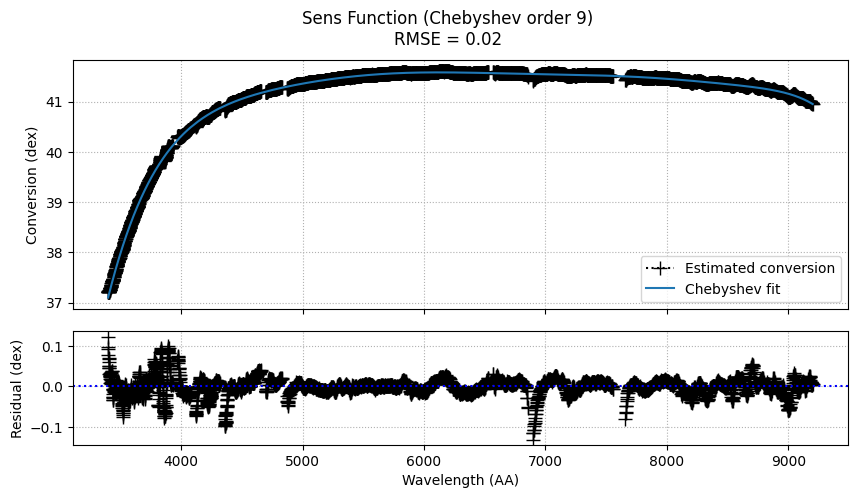

In [4]:
extinction_file_path = "/home/kostasvaleckas/Documents/DAWN/PyLongslit_notebook/database/lapalma.dat"

sensfunc(out_dir = OUTPUT_DIR,
         extinction_file_path = extinction_file_path, 
         FITTING_MODEL_SF = 'Chebyshev', 
         ORDER_SF = 9)

1.21611074940255 450.0


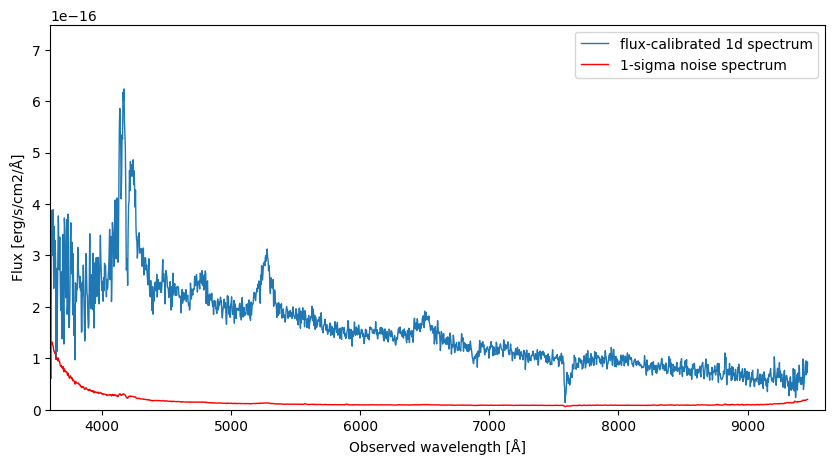

 
** Wrote output file 'flux_obj.ms_1d.fits' .
 


In [5]:
calibrate(out_dir = OUTPUT_DIR, extinction_file_path=extinction_file_path)